In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split, ShuffleSplit
from classifiers import TransparentLogisticRegression, TransparentLinearRegression
from matplotlib import pylab as pl
from scipy.sparse import diags
from IPython import display
from scale import decision_tree_scale
from IPython.display import display, HTML
from ipy_table import *
from IPython.display import Image

In [2]:
# calculate # of instances between mean and splitting points for each feature
def get_num_instances(X, mean1, mean2):
    # m is # of instances, n is # of features, also the length of mean1 and mean2
    m, n = np.shape(X)
    result = []
    for i in range(n):
        current_feature = X[:,i]
        if mean1[i]>mean2[i]:
            a = mean2[i]
            b = mean1[i]
        else:
            a = mean1[i]
            b = mean2[i]
        num = ((current_feature > a) & (current_feature < b)).sum()
        result.append(num)
   
    return result

In [3]:
def transform(X, mns, sstd, axis=0):
    X = np.asanyarray(X)
    if axis and mns.ndim < X.ndim:

        return ((X - np.expand_dims(mns, axis=axis)) /
                    np.expand_dims(sstd, axis=axis))
    else:

        return (X - mns) / sstd

In [4]:
# combine header and table 
def combine_table(header, table):

    result = np.concatenate((header, table), axis=0)
    return result

In [5]:
# breast-w
# source link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29
# relevant paper: Multisurface method of pattern separation for medical diagnosis applied to breast cytology

dataset = "breast-w.csv"
class_index = 9
num_cols = 10
classes = ['benign', 'malignant']
read_cols = [i for i in range(num_cols) if i != class_index]
file_path = "D:\\IIT_Master\\2016 Spring\\CS597\\uci\\uci\\uci-tar\\nominal\\"+dataset

In [6]:
# ['Clump_Thickness' 'Cell_Size_Uniformity' 'Cell_Shape_Uniformity' 'Marginal_Adhesion' 'Single_Epi_Cell_Size' 'Bare_Nuclei' 'Bland_Chromatin'
#  'Normal_Nucleoli' 'Mitoses' 


with open(file_path, 'r') as f:
    header = f.readline()
    #print header
    #header = np.fromstring("a, b", dtype=np.str_, sep=',')
    header = np.array(header.split(','))
    feature_names = header[read_cols]

In [7]:
# Loading the data and splitting the train, test

X = np.loadtxt(file_path, dtype=float, delimiter=",", skiprows=1, \
                   usecols=read_cols)
y = np.loadtxt(file_path, dtype=int, delimiter=",", skiprows=1, \
                   usecols=(class_index,), converters={class_index: lambda x: classes.index(x)})

num_inst, num_feat = np.shape(X)
print "The shape of this data set:",np.shape(X)

The shape of this data set: (699L, 9L)


In [8]:
clf_ori = TransparentLogisticRegression()
clf_ss = TransparentLogisticRegression()
clf_ig = TransparentLogisticRegression()

# Original feature

X_ori = np.copy(X)

# standard scaling 

X_ss = scale(X)

X_mean_ss = np.mean(X, axis=0)
X_std_ss = np.std(X, axis=0)

# Information scaling

X_ig = clf_ig.fit_transform(X, y)

clf_ori.fit(X_ori, y)
clf_ss.fit(X_ss, y)
clf_ig.fit(X_ig, y)

TransparentLogisticRegression(C=1.0, class_weight=None, dual=False,
               fit_intercept=True, intercept_scaling=1, max_iter=100,
               multi_class='ovr', n_jobs=1, penalty='l2',
               random_state=None, solver='liblinear', tol=0.0001,
               verbose=0, warm_start=False)

In [9]:
print clf_ori.intercept_
print clf_ss.intercept_
print clf_ig.intercept_

array1 = np.array([feature_names, clf_ori.coef_[0], clf_ss.coef_[0], clf_ig.coef_[0]])
display(make_table(array1.T))

[-6.26469047]
[-1.11181652]
[-0.34540258]


Clump_Thickness,0.268355839817,1.30750883564,1.59962074247
Cell_Size_Uniformity,0.161035620531,0.236655931212,0.241573593667
Cell_Shape_Uniformity,0.271254625375,0.830354848911,0.847119824084
Marginal_Adhesion,0.133038684375,0.597417327214,0.614026393774
Single_Epi_Cell_Size,-0.0554833619829,0.171602386436,0.180287026627
Bare_Nuclei,0.359258389322,1.35692360143,1.36453617317
Bland_Chromatin,0.18807739954,0.89801269866,0.904534205638
Normal_Nucleoli,0.147251749675,0.429887548103,0.438723613738
Mitoses,0.228714026473,0.793664689779,0.77048722654


In [10]:
a = np.array([1,2,3,4,5,6,7,8,9,10])

b = np.array([a, a, a, a, a, a, a, a, a])

b.T

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10, 10, 10]])

In [11]:
X_test_ss = transform(b.T, X_mean_ss, X_std_ss)
print "This is feature table."
display(make_table(X_test_ss))

m,n = np.shape(b.T)

X_test_ss_evi = []

for i in range(num_feat):
    temp_Xi = X_test_ss[:,i]
    temp_Xi = temp_Xi * clf_ss.coef_[0][i]
    X_test_ss_evi.append(temp_Xi)
    
X_test_ss_evi = np.array(X_test_ss_evi)
X_test_ss_evi = X_test_ss_evi.T
print "This is evi table."
display(make_table(X_test_ss_evi))

This is feature table.


-1.2147,-0.7000,-0.7433,-0.6332,-1.0015,-0.7070,-1.0005,-0.6118,-0.3439
-0.8593,-0.3720,-0.4066,-0.2828,-0.5496,-0.4292,-0.5901,-0.2841,0.2396
-0.5039,-0.0441,-0.0698,0.0677,-0.0976,-0.1513,-0.1797,0.0436,0.8231
-0.1485,0.2838,0.2669,0.4182,0.3543,0.1265,0.2307,0.3713,1.4065
0.2069,0.6118,0.6036,0.7686,0.8062,0.4043,0.6411,0.6990,1.9900
0.5623,0.9397,0.9403,1.1191,1.2582,0.6822,1.0516,1.0267,2.5735
0.9177,1.2677,1.2770,1.4696,1.7101,0.9600,1.4620,1.3545,3.1570
1.2731,1.5956,1.6138,1.8200,2.1620,1.2378,1.8724,1.6822,3.7405
1.6285,1.9236,1.9505,2.1705,2.6140,1.5157,2.2828,2.0099,4.3239
1.9839,2.2515,2.2872,2.5210,3.0659,1.7935,2.6932,2.3376,4.9074


This is evi table.


-1.5882,-0.1657,-0.6172,-0.3783,-0.1719,-0.9593,-0.8984,-0.2630,-0.2730
-1.1235,-0.0880,-0.3376,-0.1689,-0.0943,-0.5823,-0.5299,-0.1221,0.1901
-0.6588,-0.0104,-0.0580,0.0404,-0.0168,-0.2053,-0.1613,0.0187,0.6532
-0.1941,0.0672,0.2216,0.2498,0.0608,0.1717,0.2072,0.1596,1.1163
0.2706,0.1448,0.5012,0.4592,0.1384,0.5487,0.5758,0.3005,1.5794
0.7353,0.2224,0.7808,0.6686,0.2159,0.9257,0.9443,0.4414,2.0425
1.1999,0.3000,1.0604,0.8779,0.2935,1.3027,1.3129,0.5823,2.5056
1.6646,0.3776,1.3400,1.0873,0.3710,1.6797,1.6814,0.7231,2.9687
2.1293,0.4552,1.6196,1.2967,0.4486,2.0567,2.0500,0.8640,3.4318
2.5940,0.5328,1.8992,1.5061,0.5261,2.4337,2.4185,1.0049,3.8948


In [12]:
X_test_ig = clf_ig.transform(b.T)
print "This is feature table"
display(make_table(X_test_ig))

X_test_ig_evi = []

for i in range(num_feat):
    temp_Xi = X_test_ig[:,i]
    temp_Xi = temp_Xi * clf_ig.coef_[0][i]
    X_test_ig_evi.append(temp_Xi)
    
X_test_ig_evi = np.array(X_test_ig_evi)
X_test_ig_evi = X_test_ig_evi.T
print "This is evi table."
display(make_table(X_test_ig_evi))

This is feature table


-1.5712,-0.4816,-0.4913,-0.8514,-0.6450,-0.7687,-1.0257,-0.4881,-0.2913
-1.2856,-0.1605,-0.1638,-0.5108,-0.2150,-0.4914,-0.6154,-0.1627,0.2913
-0.9999,0.1605,0.1638,-0.1703,0.2150,-0.2142,-0.2051,0.1627,0.8740
-0.7142,0.4816,0.4913,0.1703,0.6450,0.0631,0.2051,0.4881,1.4567
-0.4285,0.8027,0.8189,0.5108,1.0750,0.3404,0.6154,0.8134,2.0394
-0.1428,1.1237,1.1465,0.8514,1.5049,0.6177,1.0257,1.1388,2.6221
0.1428,1.4448,1.4740,1.1920,1.9349,0.8950,1.4359,1.4642,3.2048
0.4285,1.7659,1.8016,1.5325,2.3649,1.1722,1.8462,1.7895,3.7875
0.7142,2.0870,2.1291,1.8731,2.7949,1.4495,2.2565,2.1149,4.3702
0.9999,2.4080,2.4567,2.2137,3.2249,1.7268,2.6668,2.4403,4.9529


This is evi table.


-2.5134,-0.1163,-0.4162,-0.5228,-0.1163,-1.0489,-0.9278,-0.2141,-0.2245
-2.0564,-0.0388,-0.1387,-0.3137,-0.0388,-0.6706,-0.5567,-0.0714,0.2245
-1.5994,0.0388,0.1387,-0.1046,0.0388,-0.2922,-0.1856,0.0714,0.6734
-1.1425,0.1163,0.4162,0.1046,0.1163,0.0861,0.1856,0.2141,1.1224
-0.6855,0.1939,0.6937,0.3137,0.1938,0.4645,0.5567,0.3569,1.5713
-0.2285,0.2715,0.9712,0.5228,0.2713,0.8429,0.9278,0.4996,2.0203
0.2285,0.3490,1.2487,0.7319,0.3488,1.2212,1.2989,0.6424,2.4692
0.6855,0.4266,1.5262,0.9410,0.4264,1.5996,1.6700,0.7851,2.9182
1.1425,0.5042,1.8036,1.1501,0.5039,1.9779,2.0411,0.9279,3.3672
1.5994,0.5817,2.0811,1.3592,0.5814,2.3563,2.4122,1.0706,3.8161


In [13]:
most_difference1 = [[6,4,3,4,2,4,3,3,2]]

most_difference_ss = transform(most_difference1, X_mean_ss, X_std_ss)
most_difference_ig = transform(most_difference1, clf_ig.mns, clf_ig.sstd)

a = clf_ss.predict_proba(most_difference_ss)
b = clf_ig.predict_proba(most_difference_ig)

print a 
print b 

print a[0][0] - b[0][0]

[[ 0.4981675  0.5018325]]
[[ 0.51413917  0.48586083]]
-0.015971668182


In [ ]:
# 6	1	3	1	2	1	3	1	1	benign
# 6	3	3	5	3	10	3	5	3	benign --------This one
# 6	1	3	1	4	5	5	10	1	malignant
# 6	1	3	2	2	1	1	1	1	benign
# 6	3	3	3	3	2	6	1	1	benign
# 6	2	3	1	2	1	1	1	1	benign


In [14]:
most_difference2 = [[4,4,4,4,5,4,5,4,1]]

most_difference_ss2 = transform(most_difference2, X_mean_ss, X_std_ss)
most_difference_ig2 = clf_ig.transform(most_difference2)



a = clf_ss.predict_proba(most_difference_ss2)
b = clf_ig.predict_proba(most_difference_ig2)

predict_evidences_ig = clf_ig.predict_evidences(most_difference_ig2)

print predict_evidences_ig

print a 
print b 

print a[0][0] - b[0][0]

(array([-1.71233261]), array([ 1.68784136]))
[[ 0.49872527  0.50127473]]
[[ 0.50612251  0.49387749]]
-0.00739723490027


In [15]:
# 4 	4	4	4	6	5	7	3	1	benign
# 4 	4	4	2	2	3	2	1	1	benign
# 4 	4	2	1	2	5	2	1	2	benign
# 5 	3	3	3	2	3	4	4	1	malignant
# 5 	3	3	4	2	4	3	4	1	malignant
# 4 	6	5	6	7	3.544656	4	9	1	benign


# However, when Normal_Nucleoli >= 4, it will be malignant in the most cases.

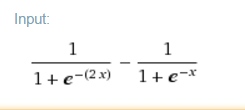

In [36]:
Image(filename='input.png')

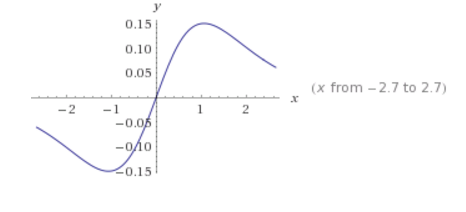

In [35]:

Image(filename='plot.png')